![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
33525,id_2643,Lisbon,"['American', 'Bar', 'Pub']",2646.0,$,10.0,"[['I love this place', 'Just alright for a che...",/Restaurant_Review-g189158-d3896146-Reviews-Ce...,d3896146,1,4.5
44185,id_9973,Paris,['French'],9975.0,NaN,12.0,"[[], []]",/Restaurant_Review-g187147-d4432599-Reviews-Le...,d4432599,1,4.0
45936,id_2720,Berlin,"['Italian', 'Mediterranean', 'European', 'Gril...",2722.0,$$ - $$$,65.0,"[['Nice Italien restaurant', 'Lovely'], ['04/1...",/Restaurant_Review-g187323-d1068523-Reviews-Ca...,d1068523,1,4.0
49880,id_5756,Rome,"['Italian', 'Brew Pub', 'Fast Food', 'Pub', 'S...",5758.0,$,2.0,"[[], []]",/Restaurant_Review-g187791-d10126641-Reviews-L...,d10126641,1,5.0
45288,id_3949,London,"['American', 'Diner', 'Gluten Free Options']",3956.0,$$ - $$$,304.0,"[['Lovely food', 'Tray the blue cheese one'], ...",/Restaurant_Review-g186338-d1123247-Reviews-Go...,d1123247,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# Метод get_dummies я здесь применять пока не буду! Мне еще потребуется колонка City, которая
# после взятия get_dummies пропадет!

In [20]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0


In [21]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
16660,id_6535,Barcelona,NaN,6536.0,NaN,2.0,"[['Good Cheap Eat'], ['01/14/2017']]",/Restaurant_Review-g187497-d12031445-Reviews-L...,d12031445,1,3.5,0
10422,id_213,Helsinki,"['Soups', 'International']",214.0,$,100.0,"[['Good simple food.', 'Amazing traditional so...",/Restaurant_Review-g189934-d784491-Reviews-Sop...,d784491,1,4.5,0
15153,id_24,Geneva,"['French', 'European', 'Vegetarian Friendly', ...",25.0,$$$$,188.0,"[['Inexplicably positive', 'Great food and goo...",/Restaurant_Review-g188057-d7095968-Reviews-Ca...,d7095968,1,4.5,0
45097,id_6249,Barcelona,NaN,6250.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187497-d5795235-Reviews-Do...,d5795235,1,3.5,0
3841,id_3841,Budapest,"['European', 'Central European', 'Hungarian', ...",293.0,$$$$,81.0,"[['Excellent food, lavish interior at exclusi....",/Restaurant_Review-g274887-d696127-Reviews-Vad...,d696127,0,0.0,0


#### Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [23]:
# Ваша обработка 'Price Range'
# заполним пропуски модой (наиболее часто встречающимся значением)
data["Price Range"]=data["Price Range"].fillna("$$ - $$$")

In [24]:
# функция, которая заменит строковые значения на float
def price_cat(string):
    if string=="$$ - $$$":
        return 2.0
    elif string=="$":
        return 1.0
    elif string=="$$$$":
        return 3.0

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

In [25]:
data["price_cat"]=data["Price Range"].apply(price_cat)

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [26]:
# тут ваш код на обработку других признаков
# создадим словарь с количеством ресторанов в каждом городе
dict_of_cities=dict(data.City.value_counts())
dict_of_cities

{'London': 7193,
 'Paris': 6108,
 'Madrid': 3813,
 'Barcelona': 3395,
 'Berlin': 2705,
 'Milan': 2694,
 'Rome': 2589,
 'Prague': 1816,
 'Lisbon': 1647,
 'Vienna': 1443,
 'Amsterdam': 1372,
 'Brussels': 1314,
 'Hamburg': 1186,
 'Munich': 1145,
 'Lyon': 1126,
 'Stockholm': 1033,
 'Budapest': 1021,
 'Warsaw': 925,
 'Dublin': 836,
 'Copenhagen': 819,
 'Athens': 776,
 'Edinburgh': 745,
 'Zurich': 685,
 'Oporto': 642,
 'Geneva': 590,
 'Krakow': 554,
 'Oslo': 488,
 'Helsinki': 475,
 'Bratislava': 380,
 'Luxembourg': 263,
 'Ljubljana': 222}

In [27]:
# напишем функцию, возвращающую количество ресторанов в данном городе для каждого ресторана
def number_of_rest(x, d=dict_of_cities):
    return d[x]

In [28]:
data["number_of_restaurants"]=data.City.apply(number_of_rest)

In [29]:
# Далее введем очень важный признак: ранг ресторана, нормированный на количество ресторанов в данном городе
data["ranking_norm_rest"]=data["Ranking"]/data["number_of_restaurants"]

In [30]:
# Воспользуемся данными из сторонних источников (Википедия). Создадим словарь с информацией о 
# количестве жителей в каждом городе
number_of_citizens={'Amsterdam': 872_757,
 'Athens': 664_046,
 'Barcelona': 1_664_182,
 'Berlin': 3_644_826,
 'Bratislava': 437_725,
 'Brussels': 185_103,
 'Budapest': 1_752_286,
 'Copenhagen': 615_993,
 'Dublin': 1_173_179,
 'Edinburgh': 488_100,
 'Geneva': 200_548,
 'Hamburg': 1_841_179,
 'Helsinki': 656_611,
 'Krakow': 779_115,
 'Lisbon': 505_526,
 'Ljubljana': 284_355,
 'London': 8_961_989,
 'Luxembourg': 626_108,
 'Lyon': 506_615,
 'Madrid': 3_266_126,
 'Milan': 1_378_689,
 'Munich': 1_471_508,
 'Oporto': 237_591,
 'Oslo': 673_469,
 'Paris': 2_148_327,
 'Prague': 1_335_084,
 'Rome': 2_870_500,
 'Stockholm': 961_609,
 'Vienna': 1_897_491,
 'Warsaw': 1_790_658,
 'Zurich': 428_737}

In [31]:
# Добавим колонку в датасет с информацией о количестве жителей
def number_of_cit(x,d=number_of_citizens):
    return d[x]

data["number_of_citizens"]=data["City"].apply(number_of_cit)

In [32]:
# Введем новые признаки: 1. ранг ресторана, нормированный на количество жителей в данном городе
# 2. количество отзывов, нормированное на количество жителей в каждом городе
data["ranking_norm_citizens"]=data["Ranking"]/data["number_of_citizens"]
data["number_of_reviews_norm_citizens"]=data["Number of Reviews"]/data["number_of_citizens"]

In [33]:
# Воспользуемся дополнительной информацией о средней зарплате по городам. Внесем дополнительную колонку
# с зарплатами
salaries={'Amsterdam': 2155,
 'Athens': 894,
 'Barcelona': 1749,
 'Berlin': 2431,
 'Bratislava': 1043,
 'Brussels': 1920,
 'Budapest': 806,
 'Copenhagen': 3270,
 'Dublin': 2505,
 'Edinburgh': 1990,
 'Geneva': 4370,
 'Hamburg': 2431,
 'Helsinki': 2509,
 'Krakow': 934,
 'Lisbon': 1019,
 'Ljubljana': 1328,
 'London': 1990,
 'Luxembourg': 3416,
 'Lyon': 2225,
 'Madrid': 1749,
 'Milan': 1878,
 'Munich': 2431,
 'Oporto': 1019,
 'Oslo': 3309,
 'Paris': 2225,
 'Prague': 1207,
 'Rome': 1878,
 'Stockholm': 2570,
 'Vienna': 1830,
 'Warsaw': 934,
 'Zurich': 4370}

def salary(x,d=salaries):
    return d[x]

data["salaries"]=data["City"].apply(salary)

In [34]:
# Нормируем колонку Ranking на средний уровень зарплат в каждом городе
data["ranking_norm_salaries"]=data["Ranking"]/data["salaries"]

In [35]:
# Вот теперь возьмем get_dummies по городам
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [36]:
# Займемся колонкой Cuisine Style. тип данных в колонке Cuisine Style - строковый. Приведем его к списку
type(data["Cuisine Style"][0])

str

In [37]:
# Напишем функцию, которая преобразует нашу колонку Cuisine Style в список кухонь. Пропуски
# пока не заполняем! Мы сделаем это позже, когда будем считать количество кухонь в каждом ресторане
def make_list(x):
    if pd.isna(x)==True:
        return np.nan
    else:
        x=x.strip("[]")
        x=x.lower()
        x=x.replace('"\"',",")
        y=x.split(",")
        return y

In [38]:
data["cuisine_style_list"]=data["Cuisine Style"].apply(make_list)

In [39]:
# Создадим функцию, возвращающую количество кухонь, предлагаемых в каждом ресторане. Если встречаем 
# пропуск, то считаем, что в данном ресторане предлагается только один тип кухни
def number_of_cuisines(x):
    if type(x)==list:
        return len(x)
    else:
        return 1

In [40]:
data["number_of_cuisines"]=data["cuisine_style_list"].apply(number_of_cuisines)

In [41]:
# Видим, что в названии кухни иногда первым символом идет пробел. Вот как здесь - " spanish"
data["cuisine_style_list"][99]

["'mediterranean'", " 'spanish'"]

In [42]:
# Напишем функцию, которая будет убирать эти пробелы.
def replace_spaces(list_of_cuisines):
    if type(list_of_cuisines)==list:
        list_of_values=[]
        for i in list_of_cuisines:
            if i[0]==" ":
                i=i.strip(" ")
                list_of_values.append(i)
            else:
                list_of_values.append(i)
        return list_of_values
    else:
        return np.nan

In [43]:
data["cuisine_style_list"]=data["cuisine_style_list"].apply(replace_spaces)

In [44]:
from datetime import datetime

In [45]:
# Обработаем колонку Reviews, содержащую сведения о дате отзыва. 
type(data["Reviews"][11])

str

In [46]:
# Функция 'вытаскивает' информацию о дате отзыва(ов) и преобразует ее в тип datetime
def to_datetime(x):
    if pd.isna(x):
        return np.nan
    if x=="[[], []]":
        return np.nan
    x=x.strip("[[]]")
    if x[-2].isdigit()==True:
        date1=x[-11:-1]
    if x[-16].isdigit()==True:
        date2=x[-25:-15]
    else:
        return datetime.strptime(date1,"%m/%d/%Y")
    return [datetime.strptime(date1,"%m/%d/%Y"),datetime.strptime(date2,"%m/%d/%Y")]

In [47]:
# В колонку datetime поместим в виде списка объекты datetime - даты отзывов, оставленных на сайте
data["datetime"]=data["Reviews"].apply(to_datetime)

In [48]:
# напишем функцию, которая считает, насколько дата отзыва(ов) отстоит от текущей даты. Если отзывов два,
# считается самый свежий отзыв
 def time_delta(x):
    if type(x)==float:
        return np.nan
    if type(x)==datetime:
        return datetime.now()-x
    else:
        delta1=datetime.now()-x[0]
        delta2=datetime.now()-x[1]
        return min(delta1,delta2)

In [49]:
data["timedelta"]=data["datetime"].apply(time_delta)

In [50]:
# Данные в колонке timedelta хранятся в формате timedelta. Чтобы их можно было использовать в нашей модели,
# переведем их сначала в тип str, а затем в integer. Функцию см. ниже
def to_int(x):
    if pd.isna(x):
        return np.nan
    y=str(x)
    i=0
    while y[i].isdigit():
        i+=1
        z=y[:i]
    return int(z)

In [51]:
# Создадим колонку last_review, которая хранит количество дней от последнего отзыва на сайте до сегодня
data["last_review"]=data["timedelta"].apply(to_int)

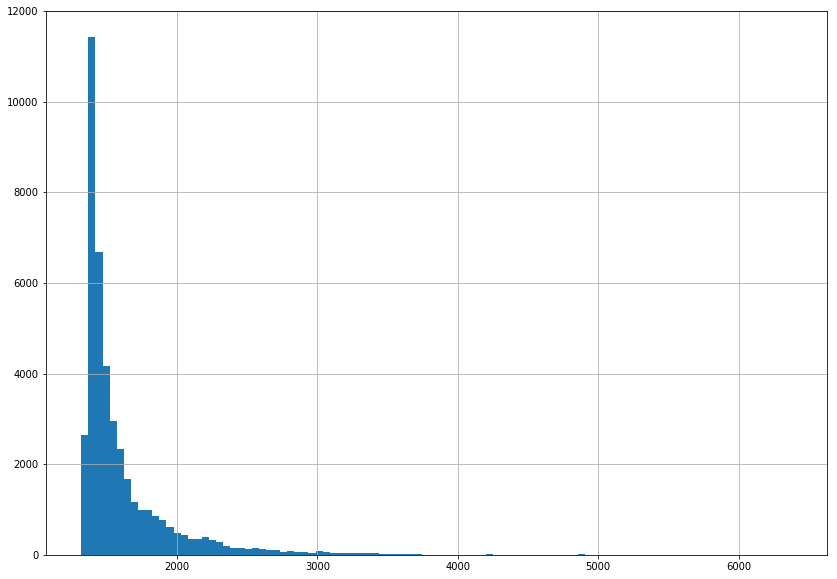

In [52]:
# Посмотрим распределение новой переменной. Видим, что есть очень большие значения, от которых лучше 
# избавиться
fig,ax=plt.subplots(figsize=(14,10))
data["last_review"].hist(bins=100)
plt.show()

In [53]:
# Напишем функцию, определяющую границы выбросов
def find_outliers(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1
    return [q1-1.5*IQR, q3+1.5*IQR]

In [54]:
# Определим границы выбросов у колонки last_review. Видим, что верхняя граница выбросов составляет 
# 2039. Посмотрим, сколько данных лежит выше этой границы
find_outliers("last_review")

[1009.0, 2041.0]

In [55]:
# Видим, что выбросов довольно много (около 10%). Удалять мы их не будем.
len(data[data["last_review"]>2039])

4023

In [56]:
# Заменим значения выше 4000 на медиану
data["last_review"]=data["last_review"].apply(lambda x: data["last_review"].median() if x>4000 else x)

In [57]:
# Мы видим, что пропусков в колонке last_review довольно много. Мы не можем их все заменить на медиану,
# т.к. при этом нарушится распределение признака
len(data[data["last_review"].isna()==True])

8114

In [58]:
import random

In [59]:
# Напишем функцию, которая заменяет пропуски рандомными данными из тех, которые уже есть в данной колонке
def replace_with_interval(i,df):
    stat = df[i].value_counts(normalize=True)
    ind = df[df[i].isna()==True].index
    fill_list = pd.Series(random.choices(stat.index, stat, k=df[i].isna().sum()))
    fill_list.index = ind
    return fill_list

In [60]:
# Заполним пропуски в колонке last_review
replace_df=replace_with_interval("last_review",data)
data["last_review"].fillna(replace_df,inplace=True)

In [61]:
# Напишем функцию, которая будет считать время между двумя отзывами. Если отзыв один, будет 
# возвращаться NaN
def time_between(x):
    if type(x)==list:
        delta=abs(x[0]-x[1])
        return delta
    else:
        return np.nan

In [62]:
# В колонку time_between поместим время между двумя отзывами в формате timedelta
data["time_between"]=data["datetime"].apply(time_between)

In [63]:
# C форматом timedelta наша модель работать не умеет. Переведем его в int с помощью ранее написанной
# функции to_int
data["time_between"]=data["time_between"].apply(to_int)

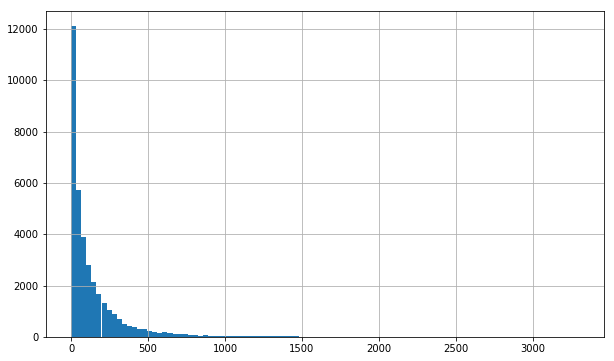

In [64]:
# Посмотрим распределение нового признака time_between
fig,ax=plt.subplots(figsize=(10,6))
data["time_between"].hist(bins=100)
plt.show()

In [65]:
# Найдем выбросы с помощью ранее написанной функции find_outliers
find_outliers("time_between")

[-209.5, 402.5]

In [66]:
# Посмотрим, много ли данных лежит вне данного интервала. Данных довольно много, мы не будем их удалять.
len(data[data["time_between"]>402.5])

2920

In [67]:
len(data[data["time_between"]>1500])

133

In [68]:
# Заменим данные больше 1500 на медиану
data["time_between"]=data["time_between"].apply(lambda x: data["time_between"].median() if x>1500 else x)

In [69]:
# Посмотрим, сколько пропусков в колонке time_between. Пропусков очень много. Мы не можем заменить их на 
# медиану, потому что тогда нарушится распределение признака. Воспользуемся функцией replace_with_interval
len(data[data["time_between"].isna()==True])

13794

In [70]:
# Заменяем пропуски в колонке time_between
replace_df=replace_with_interval("time_between",data)
data["time_between"].fillna(replace_df,inplace=True)

In [71]:
# Начинаем работать с текстом отзывов в колонке Reviews. Для начала переведем текст в нижний регистр
data["Reviews"]=data["Reviews"].apply(lambda x: x.lower() if type(x)==str else np.nan)

In [72]:
# Наша функция будет осуществлять поиск по ключевым словам, которые могут относиться к качеству еды в
# ресторане. В зависимости от найденных слов ресторану присваевается категория
def assign_category(x):
    if x=="[[], []]":
        return "unknown"
    if pd.isna(x):
        return "unknown"
    else:
        if x.find("excellent")>=0 or x.find("great")>=0 or x.find("tasty")>=0 or x.find("delicious")>=0 or x.find("very good")>=0 or x.find("best")>=0 or x.find("delight")>=0 or x.find("wonderful")>=0 or x.find("awsome")>=0 or x.find("amazing")>=0 or x.find("yummy")>=0:
            return "excellent"
        elif (x.find("good")>=0) or (x.find("lovely")>=0) or (x.find("nice")>=0) or (x.find("fun")>=0) or (x.find("authentic")>=0):
            return "good"
        elif (x.find("average")>=0) or (x.find("not bad")>=0) or (x.find("efficient")>=0):
            return "average"
        elif x.find("poor")>=0 or x.find("bad")>=0 or x.find("awful")>=0 or x.find("overpriced")>=0 or x.find("ugly")>=0 or x.find("greasy")>=0:
            return "bad"     
        else:
            return "unknown"

In [73]:
# Присвоим категорию "excellent","good","average","bad","unknown" каждому ресторану
data["restaurant_category"]=data["Reviews"].apply(assign_category)

In [74]:
# Возьмем get_dummies по колонке restaurant_category
data=pd.get_dummies(data,columns=["restaurant_category"],dummy_na=False)

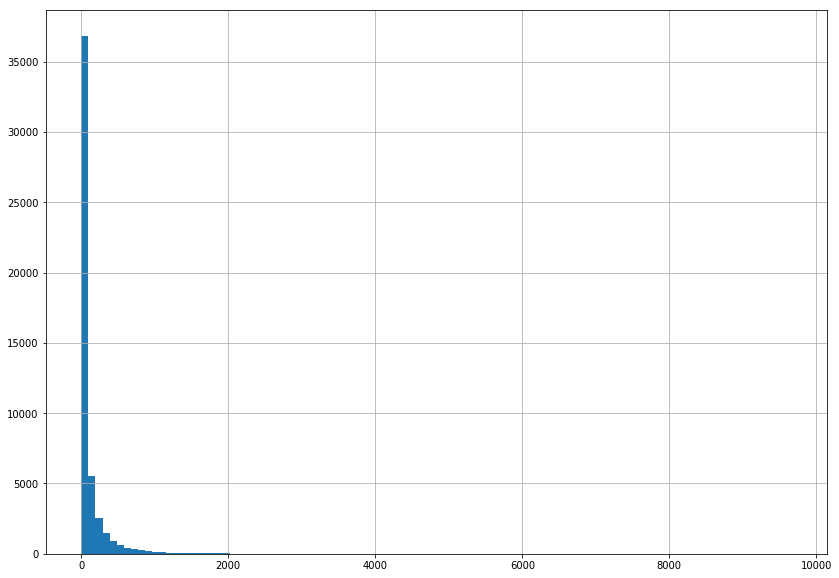

In [75]:
# Еще одна интересная переменная - Number of Reviews. Посмотрим на ее распределение
fig,ax=plt.subplots(figsize=(14,10))
data["Number of Reviews"].hist(bins=100)
plt.show()

In [76]:
# Найдем выбросы в этой колонке
find_outliers("Number of Reviews")

[-140.0, 252.0]

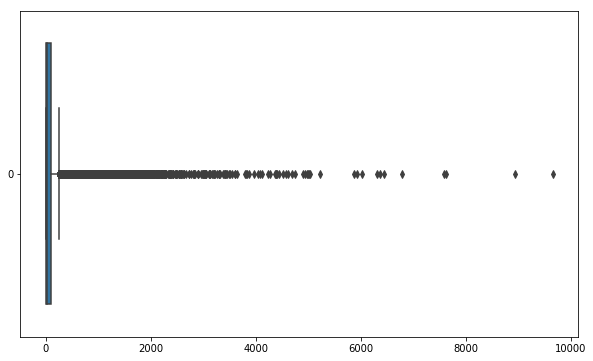

In [77]:
# Визуализируем данный признак при помощи boxplot
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=data["Number of Reviews"], orient="h")
plt.show()

In [78]:
# Выьросов довольно много. Удалять их не будем.
len(data[data["Number of Reviews"]>252])

5946

In [79]:
len(data[data["Number of Reviews"]>2000])

171

In [80]:
# Заменим значения больше 2000 на медиану
data["Number of Reviews"]=data["Number of Reviews"].apply(lambda x: data["Number of Reviews"].median() if x>2000 else x)

In [81]:
data.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Number_of_Reviews_isNAN', 'price_cat', 'number_of_restaurants',
       'ranking_norm_rest', 'number_of_citizens', 'ranking_norm_citizens',
       'number_of_reviews_norm_citizens', 'salaries', 'ranking_norm_salaries',
       'City_Amsterdam', 'City_Athens', 'City_Barcelona', 'City_Berlin',
       'City_Bratislava', 'City_Brussels', 'City_Budapest', 'City_Copenhagen',
       'City_Dublin', 'City_Edinburgh', 'City_Geneva', 'City_Hamburg',
       'City_Helsinki', 'City_Krakow', 'City_Lisbon', 'City_Ljubljana',
       'City_London', 'City_Luxembourg', 'City_Lyon', 'City_Madrid',
       'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris',
       'City_Prague', 'City_Rome', 'City_Stockholm', 'City_Vienna',
       'City_Warsaw', 'City_Zurich', 'City_nan', 'cuisine_style_list',
       'number_of_cuisines', 'datetime', 'timede

In [82]:
# У нас есть интересная колонка - Restaurant_id. Она содержит информацию о сетях ресторанов.
# Создадим словарь, куда запишем количество ресторанов в каждой сети
dict_of_nets=dict(data["Restaurant_id"].value_counts())

In [83]:
# Введем дополнительную колонку с размером сети ресторанов
def size_of_net(x,d=dict_of_nets):
    return d[x]

data["net_size"]=data["Restaurant_id"].apply(size_of_net)

In [84]:
# Пронормируем два наших количественных признака на размер сети ресторанов
data["ranking_norm_net_size"]=data["Ranking"]/data["net_size"]
data["number_of_reviews_norm_net_size"]=data["Number of Reviews"]/data["net_size"]

In [85]:
# object_columns = [s for s in data.columns if data[s].dtypes == 'object' or data[s].dtypes == 'timedelta64[ns]']
# df_preproc=data.drop(object_columns, axis = 1)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

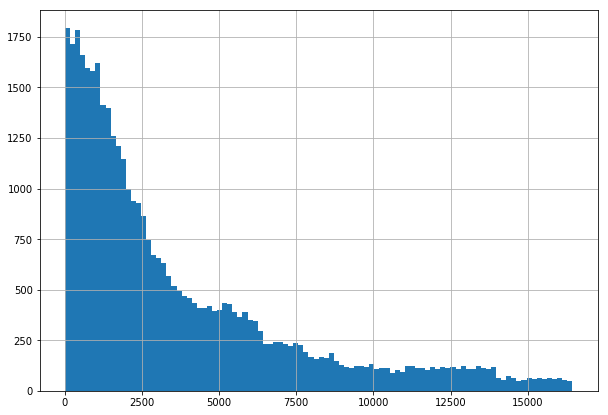

In [86]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

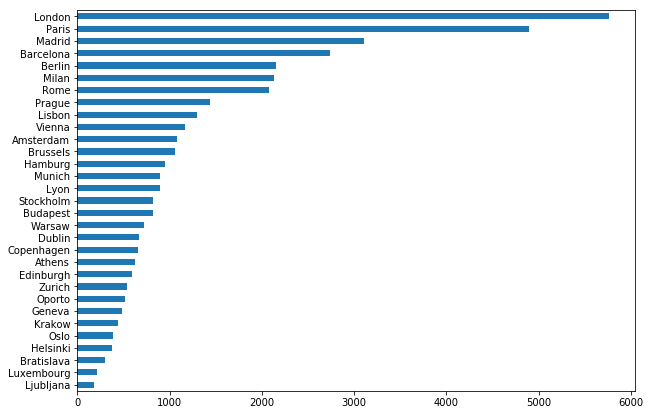

In [87]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

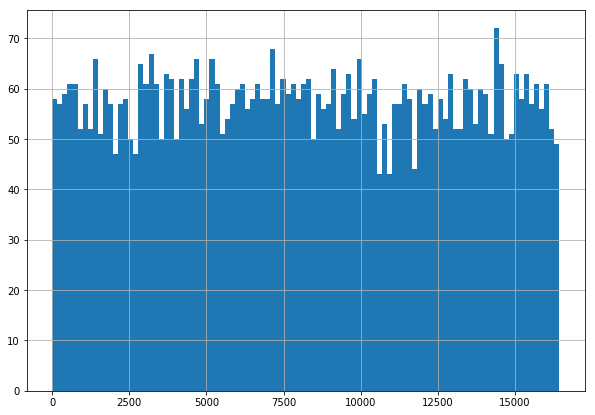

In [88]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

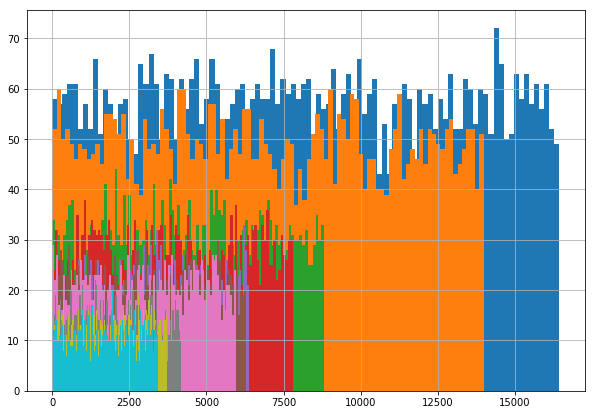

In [89]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

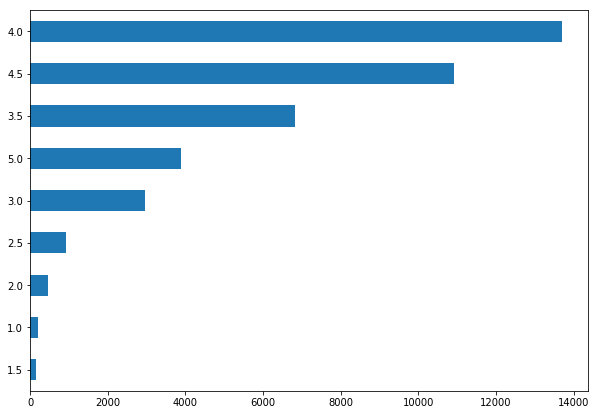

In [90]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

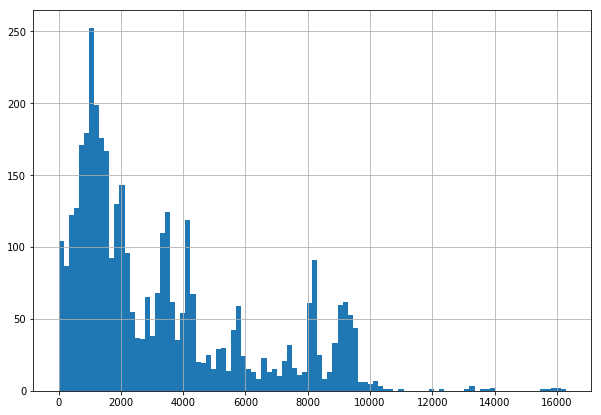

In [91]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

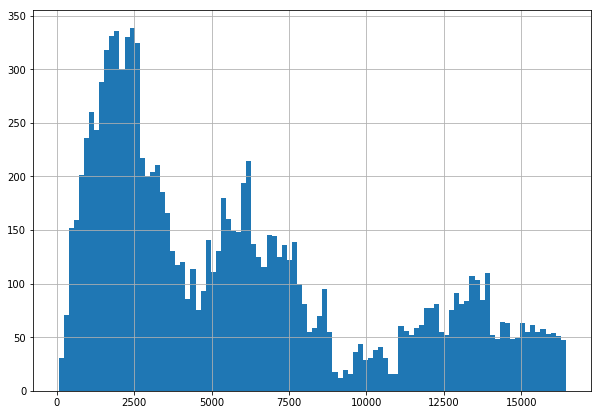

In [92]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

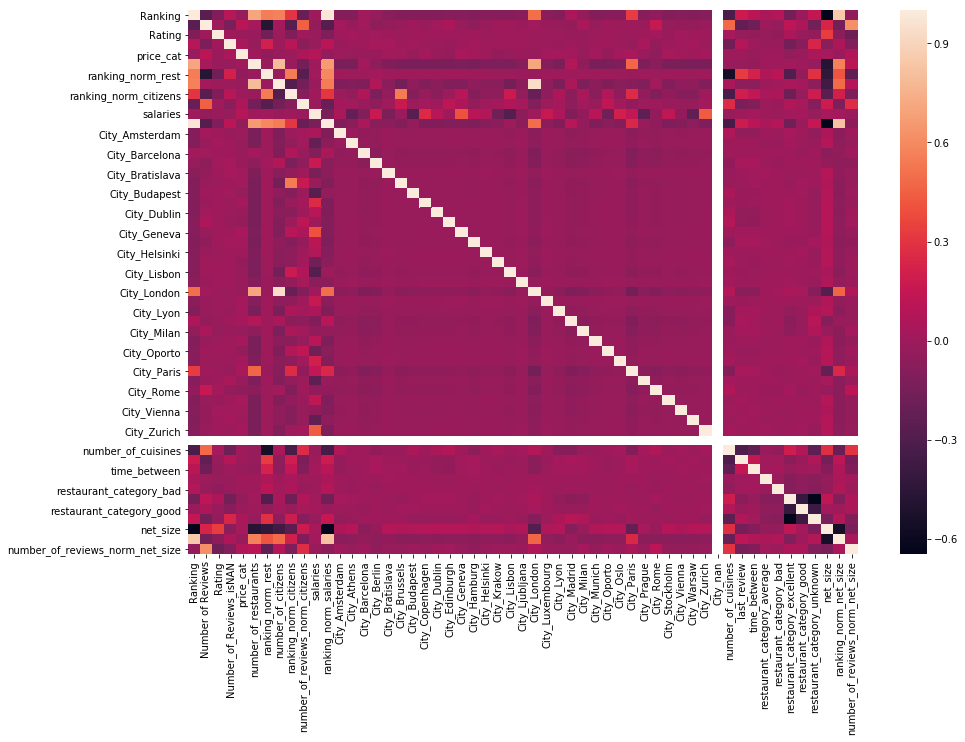

In [93]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [94]:

data.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Number_of_Reviews_isNAN', 'price_cat', 'number_of_restaurants',
       'ranking_norm_rest', 'number_of_citizens', 'ranking_norm_citizens',
       'number_of_reviews_norm_citizens', 'salaries', 'ranking_norm_salaries',
       'City_Amsterdam', 'City_Athens', 'City_Barcelona', 'City_Berlin',
       'City_Bratislava', 'City_Brussels', 'City_Budapest', 'City_Copenhagen',
       'City_Dublin', 'City_Edinburgh', 'City_Geneva', 'City_Hamburg',
       'City_Helsinki', 'City_Krakow', 'City_Lisbon', 'City_Ljubljana',
       'City_London', 'City_Luxembourg', 'City_Lyon', 'City_Madrid',
       'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris',
       'City_Prague', 'City_Rome', 'City_Stockholm', 'City_Vienna',
       'City_Warsaw', 'City_Zurich', 'City_nan', 'cuisine_style_list',
       'number_of_cuisines', 'datetime', 'timede

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

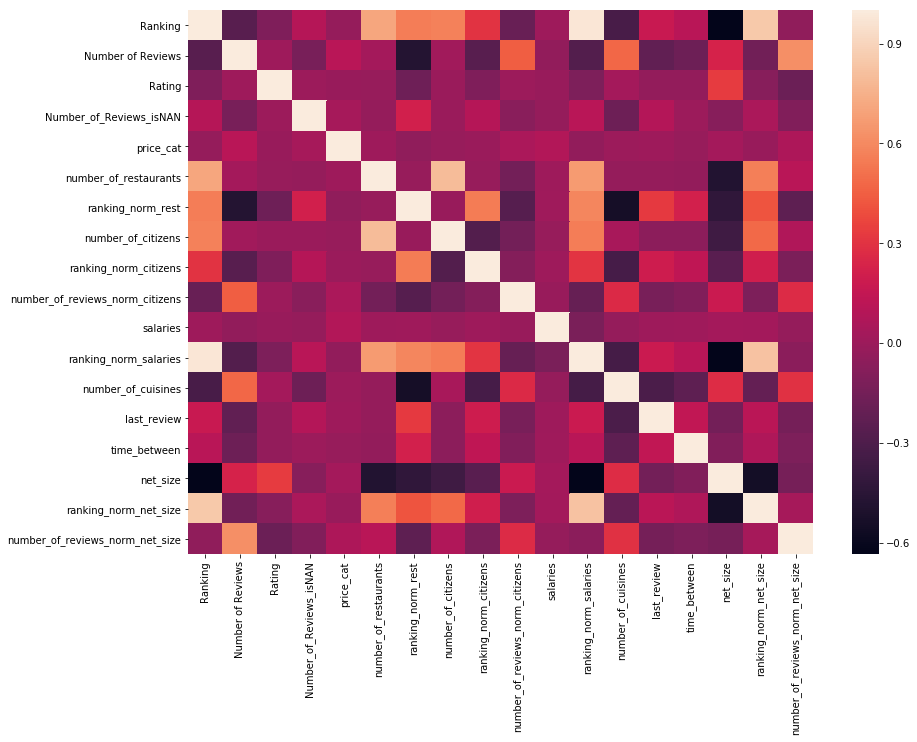

In [95]:
# Предыдущая визуализация содержит слишком много признаков. Чтобы сделать ее читабельной, избавимся от 
# большинства колонок
fig,ax=plt.subplots(figsize=(14,10))
sns.heatmap(data.drop(["sample",'restaurant_category_average',
       'restaurant_category_bad', 'restaurant_category_excellent',
       'restaurant_category_good', 'restaurant_category_unknown', 
       'City_Amsterdam', 'City_Athens', 'City_Barcelona', 'City_Berlin',
       'City_Bratislava', 'City_Brussels', 'City_Budapest', 'City_Copenhagen',
       'City_Dublin', 'City_Edinburgh', 'City_Geneva', 'City_Hamburg',
       'City_Helsinki', 'City_Krakow', 'City_Lisbon', 'City_Ljubljana',
       'City_London', 'City_Luxembourg', 'City_Lyon', 'City_Madrid',
       'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris',
       'City_Prague', 'City_Rome', 'City_Stockholm', 'City_Vienna',
       'City_Warsaw', 'City_Zurich', 'City_nan'],axis=1).corr())
plt.show()

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [96]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [97]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    df_output["Price Range"]=df_output["Price Range"].fillna("$$ - $$$")
    
    # ################### 3. Encoding ############################################################## 
    # тут ваш код не Encoding фитчей
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output["price_cat"]=df_output["Price Range"].apply(price_cat)
    dict_of_cities=dict(df_output.City.value_counts())
    df_output["number_of_restaurants"]=df_output["City"].apply(number_of_rest)
    df_output["ranking_norm_rest"]=df_output["Ranking"]/df_output["number_of_restaurants"]
    df_output["number_of_citizens"]=df_output["City"].apply(number_of_cit)
    df_output["ranking_norm_citizens"]=df_output["Ranking"]/df_output["number_of_citizens"]
    df_output["number_of_reviews_norm_citizens"]=df_output["Number of Reviews"]/df_output["number_of_citizens"]
    df_output["salaries"]=df_output["City"].apply(salary)
    df_output["ranking_norm_salaries"]=df_output["Ranking"]/df_output["salaries"]
    
#   я убрала взятие get_dummies на несколько шагов дальше, потому что мне нужна колонка City
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    df_output["cuisine_style_list"]=df_output["Cuisine Style"].apply(make_list)
    df_output["number_of_cuisines"]=df_output["cuisine_style_list"].apply(number_of_cuisines)
    df_output["cuisine_style_list"]=df_output["cuisine_style_list"].apply(replace_spaces)
    df_output["datetime"]=df_output["Reviews"].apply(to_datetime)
    df_output["timedelta"]=df_output["datetime"].apply(time_delta)
    df_output["last_review"]=df_output["timedelta"].apply(to_int)
    df_output["last_review"]=df_output["last_review"].apply(lambda x: df_output["last_review"].median() if x>4000 else x)
    repl_df=replace_with_interval("last_review",df_output)
    df_output["last_review"].fillna(repl_df,inplace=True)
    df_output["time_between"]=df_output["datetime"].apply(time_between)
    df_output["time_between"]=df_output["time_between"].apply(to_int)
    df_output["time_between"]=df_output["time_between"].apply(lambda x: df_output["time_between"].median() if x>1500 else x)
    repl_df=replace_with_interval("time_between",df_output)
    df_output["time_between"].fillna(repl_df,inplace=True)
    df_output["Reviews"]=df_output["Reviews"].apply(lambda x: x.lower() if type(x)==str else np.nan)
    df_output["restaurant_category"]=df_output["Reviews"].apply(assign_category)
    df_output=pd.get_dummies(df_output,columns=["restaurant_category"],dummy_na=False)
    df_output["Number of Reviews"]=df_output["Number of Reviews"].apply(lambda x: df_output["Number of Reviews"].median() if x>2000 else x)

    df_output["net_size"]=df_output["Restaurant_id"].apply(size_of_net)
    df_output["ranking_norm_net_size"]=df_output["Ranking"]/df_output["net_size"]
    df_output["number_of_reviews_norm_net_size"]=df_output["Number of Reviews"]/df_output["net_size"]
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object' or df_output[s].dtypes == 'timedelta64[ns]']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [98]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,price_cat,number_of_restaurants,ranking_norm_rest,number_of_citizens,ranking_norm_citizens,...,last_review,time_between,restaurant_category_average,restaurant_category_bad,restaurant_category_excellent,restaurant_category_good,restaurant_category_unknown,net_size,ranking_norm_net_size,number_of_reviews_norm_net_size
3907,3865.0,11.0,0,0.0,0,2.0,2694,1.434670,1378689,0.002803,...,1439.0,30.0,0,0,0,0,1,1,3865.000000,11.000000
38227,1867.0,7.0,1,3.5,0,2.0,1033,1.807357,961609,0.001942,...,1789.0,131.0,0,0,0,1,0,6,311.166667,1.166667
9453,948.0,21.0,0,0.0,0,2.0,488,1.942623,673469,0.001408,...,1533.0,220.0,0,0,0,1,0,1,948.000000,21.000000
14263,1231.0,11.0,1,4.0,0,2.0,1186,1.037943,1841179,0.000669,...,1387.0,67.0,0,0,1,0,0,13,94.692308,0.846154
39327,1891.0,12.0,1,5.0,0,1.0,2705,0.699076,3644826,0.000519,...,1688.0,279.0,0,0,0,0,1,8,236.375000,1.500000
46409,2101.0,38.0,1,4.5,0,2.0,2694,0.779881,1378689,0.001524,...,1371.0,109.0,0,0,0,0,1,9,233.444444,4.222222
1426,1609.0,0.0,0,0.0,0,2.0,836,1.924641,1173179,0.001371,...,2784.0,29.0,0,0,0,0,1,11,146.272727,0.000000
13529,4971.0,5.0,1,4.5,0,2.0,3813,1.303698,3266126,0.001522,...,1374.0,42.0,0,0,0,0,1,4,1242.750000,1.250000
43722,3517.0,67.0,1,3.0,0,2.0,1647,2.135398,505526,0.006957,...,1417.0,180.0,0,0,0,0,1,5,703.400000,13.400000
6917,324.0,645.0,0,0.0,0,1.0,1021,0.317336,1752286,0.000185,...,1420.0,53.0,0,0,0,0,1,2,162.000000,322.500000


In [99]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
Ranking                            50000 non-null float64
Number of Reviews                  50000 non-null float64
sample                             50000 non-null int64
Rating                             50000 non-null float64
Number_of_Reviews_isNAN            50000 non-null uint8
price_cat                          50000 non-null float64
number_of_restaurants              50000 non-null int64
ranking_norm_rest                  50000 non-null float64
number_of_citizens                 50000 non-null int64
ranking_norm_citizens              50000 non-null float64
number_of_reviews_norm_citizens    50000 non-null float64
salaries                           50000 non-null int64
ranking_norm_salaries              50000 non-null float64
City_Amsterdam                     50000 non-null uint8
City_Athens                        50000 non-null uint8
City_Barcelona                     

In [100]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [101]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [102]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 55), (40000, 55), (40000, 54), (32000, 54), (8000, 54))

# Model 
Сам ML

In [103]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [104]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [105]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [106]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.203048125


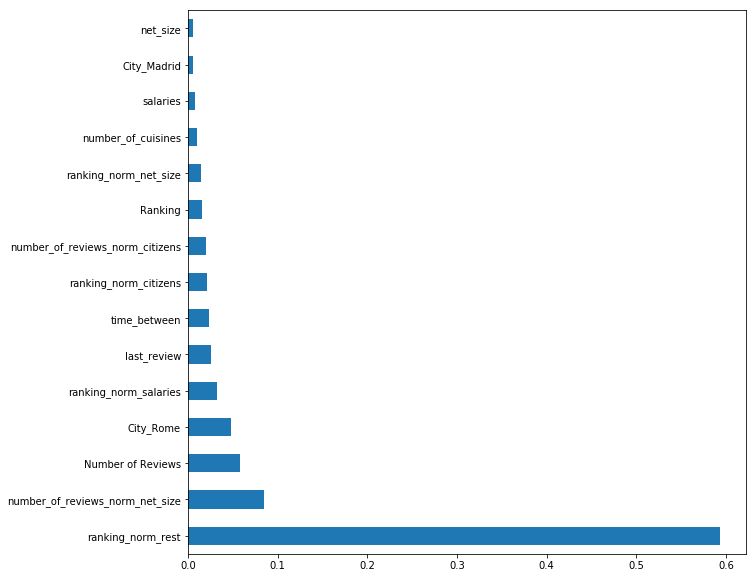

In [107]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

**Выводы:**
1. В датасет были внесены дополнительно 15 числовых признаков, не считая тех, которые были получены в результате применения метода get_dummies. Были внесены следующие признаки: 'Number_of_Reviews_isNAN', 'price_cat', 'number_of_restaurants', 'ranking_norm_rest', 'number_of_citizens', 'ranking_norm_citizens', 'number_of_reviews_norm_citizens', 'salaries','ranking_norm_salaries', 
'number_of_cuisines', 'last_review', 'time_between', 'net_size', 'ranking_norm_net_size', 'number_of_reviews_norm_net_size'. Самым важным из них при обучении модели оказался признак 'ranking_norm_rest'. Этот признак показывается ранг ресторана, нормированный на число ресторанов в данном городе.
2. При анализе новых количественных признаков применялись методы работы с выбросами и визуализация. Часто новые признаки содержали много пропусков. Заполнение их проводилось либо медианой, либо случайными значениями из уже имеющихся.
3. Дважды был применен метод get_dummies (к колонке City и колонке restaurant_category). Это увеличило общее число количественных признаков до 55.
4. Для Feature Engeneering использовались внешние источники данных (Википедия).
5. Расширение числа количественных признаков позволило получить значение метрики MAE, равное 0.2028.

# Submission
Если все устраевает - готовим Submission на кагл

In [108]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,price_cat,number_of_restaurants,ranking_norm_rest,number_of_citizens,ranking_norm_citizens,number_of_reviews_norm_citizens,...,last_review,time_between,restaurant_category_average,restaurant_category_bad,restaurant_category_excellent,restaurant_category_good,restaurant_category_unknown,net_size,ranking_norm_net_size,number_of_reviews_norm_net_size
8899,4988.0,54.0,0.0,0,3.0,6108,0.816634,2148327,0.002322,0.000025,...,1490.0,70.0,0,0,0,1,0,3,1662.666667,18.000000
9707,1456.0,859.0,0.0,0,2.0,2694,0.540460,1378689,0.001056,0.000623,...,1524.0,94.0,0,0,1,0,0,2,728.000000,429.500000
1676,3505.0,27.0,0.0,0,1.0,3395,1.032401,1664182,0.002106,0.000016,...,1843.0,124.0,0,0,1,0,0,4,876.250000,6.750000
5239,1097.0,0.0,0.0,0,2.0,776,1.413660,664046,0.001652,0.000000,...,1376.0,53.0,0,0,0,0,1,2,548.500000,0.000000
6631,2072.0,0.0,0.0,0,2.0,1186,1.747049,1841179,0.001125,0.000000,...,1983.0,152.0,0,0,0,0,1,1,2072.000000,0.000000
2735,3202.0,40.0,0.0,0,2.0,3395,0.943152,1664182,0.001924,0.000024,...,1660.0,135.0,0,0,1,0,0,6,533.666667,6.666667
8494,6028.0,3.0,0.0,0,2.0,3395,1.775552,1664182,0.003622,0.000002,...,1549.0,168.0,0,0,1,0,0,2,3014.000000,1.500000
3477,10293.0,10.0,0.0,0,2.0,6108,1.685167,2148327,0.004791,0.000005,...,1553.0,335.0,0,0,0,0,1,5,2058.600000,2.000000
3182,11248.0,39.0,0.0,0,2.0,6108,1.841519,2148327,0.005236,0.000018,...,1452.0,386.0,0,0,1,0,0,4,2812.000000,9.750000
2066,4745.0,289.0,0.0,0,2.0,3395,1.397644,1664182,0.002851,0.000174,...,1416.0,4.0,0,0,0,0,1,6,790.833333,48.166667


In [109]:
test_data = test_data.drop(['Rating'], axis=1)

In [110]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [111]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [112]:
predict_submission

array([3.135, 4.155, 4.485, ..., 3.11 , 4.415, 4.185])

In [113]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.135
1,id_1,4.155
2,id_2,4.485
3,id_3,4.180
4,id_4,4.485
5,id_5,4.295
6,id_6,1.940
7,id_7,2.485
8,id_8,4.050
9,id_9,4.540
